# Gerekli Kütüphanelerin Eklenmesi 

In [677]:
#Gerekli kütüphaneleri projeye ekleyerek başlıyoruz. 
import pandas as pd #veri işlemleri için pandas kütüphanesini kullanırız
import numpy as np  #sayısal işlemler için numpy kullanacağız
import matplotlib.pyplot as plt #grafik işlemleri için 
from sklearn.model_selection import train_test_split , cross_val_score #test-eğitim verileri bölme vb. işlemler için
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler #veri ölçeklendirme

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR #SVR modeli ---> benim ödevdeki algoritmam 
from sklearn.linear_model import LinearRegression #lineer regresyon 
from sklearn.preprocessing import PolynomialFeatures #Polinom regresyon 
from sklearn.metrics import mean_absolute_error, r2_score #Değerlendirme metrikleri
from sklearn.pipeline import Pipeline

#grafiklerin notebook içinde görünmesini sağlamak için aşağıdaki komutu yazıyoruz
%matplotlib inline 

# Veri Önişleme 

* Veri Setini Okuma Ve İlk 5 Veriyi Yazdırma / Eksik Değerleri Kontrol

In [678]:
#Verileri okuyacağız 
file_path = "data/forest_fires.csv" #veri setinin yolunu yazıyoruz. 
data = pd.read_csv(file_path, skiprows=1, header=0, encoding='utf-8') #Burada dosyayı okuyoruz. 

print("Veri Setinin Ilk 5 Satırı:") #veri setinde bulunan ilk 5 veriyi çekiyoruz
display(data.head()) #ilk 5 veriyi çekecek komut

print("\nVeri Setinin Bilgisi:")
data.info() #veri seti hakkında genel bilgiyi bize yazacak

print("\nEksik Değerler:")
print(data.isnull().sum()) #eksik değerleri kontol edeceğiz ve print ile yazdıracağız


Veri Setinin Ilk 5 Satırı:


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire



Veri Setinin Bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB

Eksik Değerler:
day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC  

* Eksik Değerlerin Temizlenmesi/Düzeltilmesi 

In [679]:
#ilk denemem de veri türlerini dikkate almadığım için hata aldım
#veri türlerini kontrol ederek sütunları inceleyelim 
print("\n Sütunlar ve veri türleri")
print(data.dtypes) #bu komut ile veri türlerini kontrol ediyoruz :)

#veri tablosundaki yazım şeklinden ötürü hata veriyordu. 
#Ben de bunu önlemek adına hepsinin başındaki boşlukları silip hepsini büyük harfle yazdırdım.
data.columns = data.columns.str.strip().str.upper()
# Eksik Değer Kontrol ve Doldurma
numeric_columns = ['TEMPERATURE', 'RH', 'WS', 'RAIN', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
categorical_columns = ['DAY', 'CLASSES']

#Sayısal verilere dönüştürme işlemi yapacağız
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

#bu kısımda da kategorik verilere dönüşütürme işlemi yapacağız
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Kategorik Verileri Sayısallaştırma
#day kısmında sözel değerler var bunlarla işlem yapmamız için sayısallaştırmamız gerekiyor. 
categorical_columns = ['DAY', 'MONTH', 'YEAR', 'CLASSES']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

#eksik sütunları ortalama alarak tamamlıyoruz
print("\n Eksik değerlerin doldurulması")
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


print("\n Sütunlar ve veri türleri")
print(data.dtypes)

#Eksik değerler doldurulduktan sonrası
print("\n Sonrası")
print(data.isnull().sum())
print("\n İlk 5 veri")
display(data.head())


 Sütunlar ve veri türleri
day            object
month          object
year           object
Temperature    object
 RH            object
 Ws            object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object

 Eksik değerlerin doldurulması

 Sütunlar ve veri türleri
TEMPERATURE                          float64
RH                                   float64
WS                                   float64
RAIN                                 float64
FFMC                                 float64
DMC                                  float64
DC                                   float64
ISI                                  float64
BUI                                  float64
FWI                                  float64
DAY_02                                  bool
DAY_03                                  bool
DAY_04                                  bool
DAY_05 

,TEMPERATURE,RH,WS,RAIN,FFMC,DMC,DC,ISI,BUI,FWI,...,MONTH_month,YEAR_year,CLASSES_fire,CLASSES_fire,CLASSES_fire,CLASSES_not fire,CLASSES_not fire,CLASSES_not fire,CLASSES_not fire,CLASSES_not fire
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,...,False,False,False,False,False,False,False,True,False,False
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,...,False,False,False,False,False,False,False,True,False,False
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,...,False,False,False,False,False,False,False,True,False,False
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,...,False,False,False,False,False,False,False,True,False,False
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,...,False,False,False,False,False,False,False,True,False,False


* Öznitelik Seçimi 

In [680]:
#Ödev de bana "ilk 1-6 arası öznitelikler kullanılarak modelleme yapılacaktır " şeklinde bir ibare verildiği için buna dikkate alarak öznitelik seçimlerini yapacağım
# ilk 1-6 sütun bağımsız değişkenler yani x olacak 
x = data.iloc[:, 1:7]
print(x.columns)

#Bağımlı değişken olarak FWI sütununu seçeceğim
y = data['FWI']

#Seçimleri doğrulamak için verilerin boyutunu kontrol edeceğiz
print("\n Bağımsız Değişken Boyutu", x.shape)
print("\n Bağımlı Değişken Boyutu", y.shape )

#ilk 5 satır görüntüleme 
print("\n Bağımsız Değişkenler:")
display(x.head())
print("\n Bağımlı Değişken:")
display(y.head())


Index(['RH', 'WS', 'RAIN', 'FFMC', 'DMC', 'DC'], dtype='object')

 Bağımsız Değişken Boyutu (246, 6)

 Bağımlı Değişken Boyutu (246,)

 Bağımsız Değişkenler:


,RH,WS,RAIN,FFMC,DMC,DC
0,57.0,18.0,0.0,65.7,3.4,7.6
1,61.0,13.0,1.3,64.4,4.1,7.6
2,82.0,22.0,13.1,47.1,2.5,7.1
3,89.0,13.0,2.5,28.6,1.3,6.9
4,77.0,16.0,0.0,64.8,3.0,14.2



 Bağımlı Değişken:


0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

# Verinin Eğitim ve Test Setlerine Ayrılması 

In [681]:
#Veri setini eğitim ve test verisi olarak ikiye böleceğiz. 
#Ben %70 eğitim - %30 test verisi olarak ayıracağım fakat %80 eğitim - %20 test şeklinde de bölünebilir
#Ben projenin performansını ölçmek için 70-30 seçtim. Model daha iyi öğrensin istersek 80-20 seçilebilir.

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5, random_state=42) #bu komut ile veri setini böldük
print("\nEğitim Seti Boyutu:")
print("x_train:", x_train.shape, "y_train:", y_train.shape) #shape ile görüntüleme işlemi yapacağız
print("\nTest Seti Boyutu:")
print("x_test:", x_test.shape, "y_test:", y_test.shape)



Eğitim Seti Boyutu:
x_train: (123, 6) y_train: (123,)

Test Seti Boyutu:
x_test: (123, 6) y_test: (123,)


* Veri Ölçeklendirme

In [682]:
#StandardScaler, veri setindeki özelliklerin(features) standartlaştırılmasını sağlar. 
#sklearn.preprocessing modülünde yer alır
#veriyi hazırlamak için kullanacağız 
#Bunu kullanmak bize 2 katkı sağlayacak
#1. Modelin daha hızlı ve daha doğru öğrenmesi sağlanır.
#2. Özniteliklerin (features) farklı ölçekleri arasında dengesizlik önlenir.

#SVR modelinde veri ölçeklendirme yapacağız. Bunu yaparken StandardScaler kullanarak normalleştirme yapacağız.
#ilk yazdığım kodda sayısal olmayan değişkenleri hesaba katmamıştım. 
#StandardScaler yalnızca sayısal değerler üzerinde çalışır.

#Sayısal sütunlara dönüştürme işlemi yapalım sonrasında NaN değerler için kontrol ve doldurma işlemi yapalım
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')
x_train = x_train.fillna(x_train.mean())#fillna() fonksiyonu ile eksik değerler doldurulur
x_test = x_test.fillna(x_test.mean())

scaler = StandardScaler() #Ölçeklendirme işlemine burada başlıyoruz

x_train_scaled = scaler.fit_transform(x_train) #eğitim seti ölçeklendirme
x_test_scaled = scaler.transform(x_test) #test setini ölçeklendirme işlemi

#y_train ölçeklendirme işlemi yapıyoruz
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))


print("\n Ölçeklendirme Eğitim Seti Boyutu", x_train_scaled.shape)
print("\n Ölçeklendirilmiş Test Seti Boyutu:", x_test_scaled.shape)


 Ölçeklendirme Eğitim Seti Boyutu (123, 6)

 Ölçeklendirilmiş Test Seti Boyutu: (123, 6)


# Model Kurulumu 
* SVR için model oluşturup eğiteceğiz
* kernel= 'rbf' bu SVR modelinin kullandığı çekirdek fonksiyonunu belirtir.
* rbf(Radial Basis Function), doğrusal olmayan ilişkiler için yaygın olarak kullanılan bir çekirdek fonksiyonudur. Veriler arasındaki mesafeyi hesaplarken daha esnek bir model sağlar. 

** Modeli geliştirmek için hiperparametre optimizasyonu yapacağım. 
SVR için

In [683]:
svr_model = SVR(kernel='rbf', C=10, epsilon=0.3, gamma=0.1) #modeli tanımlıyoruz / performansını ölçükten sonra  Hiperparametre optimizasyonu denemesi yaptım
svr_model.fit(x_train_scaled, y_train_scaled) #modeli eğitim verisi ile eğitiyoruz
print("\n SVR modeli eğitildi")


 SVR modeli eğitildi


In [684]:

# Hiperparametre Optimizasyonu (SVR)
param_grid_svr = {
    'C': [1, 10, 100],
    'epsilon': [0.1, 0.5, 1],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='r2', verbose=1)
grid_search_svr.fit(x_train_scaled, y_train_scaled)
best_svr = grid_search_svr.best_estimator_

Fitting 5 folds for each of 72 candidates, totalling 360 fits


* PR - Polynomial Regression

** Hiperparametre Optimizasyonu (Polynomial Regression)


In [685]:

# Pr 
poly_features = PolynomialFeatures(degree = 2) #polinom derecesine verdik
#eğitim ve testi dönüşüme sokuyoruz
x_train_poly = poly_features.fit_transform(x_train_scaled) 
x_test_poly = poly_features.transform(x_test_scaled)

#modeli eğitme 
pr_model = LinearRegression()
pr_model.fit(x_train_poly, y_train_scaled)

LinearRegression()

In [686]:
pipeline_pr = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('linear_regression', LinearRegression())
])
param_grid_pr = {
    'poly_features__degree': [2, 3, 4]
}
grid_search_pr = GridSearchCV(pipeline_pr, param_grid_pr, cv=5, scoring='r2', verbose=1)
grid_search_pr.fit(x_train_scaled, y_train_scaled)
best_pr = grid_search_pr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


# Tahminler Ve Performans Değerlendirmesi
* Test verisi ile tahmin yapacağız
* Metrikleri kullanarak performans değerlendireceğiz
* Sonuçları görselleştireceğiz


* SVR

In [687]:
y_pred_scaled = best_svr.predict(x_test_scaled) #test verisi ile burada tahmin yapıyoruz
y_pred = y_scaler.inverse_transform(y_pred_scaled.reshape(-1,1)) #tahmin edilen değerleri orijinal ölçeğe dönüştürüyoruz

print("\nGerçek ilk 5 değer: ")
print(y_test[:5].values)

print("\n Tahmin edilen değerler")
print(y_pred[:5].ravel())


Gerçek ilk 5 değer: 
[ 1.7  7.2  9.  13.7  6.4]

 Tahmin edilen değerler
[ 2.44144005  6.73287251  9.27063508 14.10767911  6.76775322]


In [688]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print("\n Model Performansı:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Skoru: {r2:.4f}")


 Model Performansı:
Mean Absolute Error (MAE): 0.8548
R² Skoru: 0.9554


* PR

In [689]:
#test ile tahmin yapma
y_pred_pr_scaled = best_pr.predict(x_test_scaled)
y_pred_pr = y_scaler.inverse_transform(y_pred_pr_scaled.reshape(-1, 1))

#performans değerlendirme
mae_pr = mean_absolute_error(y_test, y_pred_pr)
r2_pr = r2_score(y_test, y_pred_pr)

print("\n Pol Reg performans")
print(f"Mean Absolute Error (MAE): {mae_pr:.4f}")
print(f"R² Skoru: {r2_pr:.4f}")


 Pol Reg performans
Mean Absolute Error (MAE): 1.0764
R² Skoru: 0.9411


## Çapraz Doğrulama

In [690]:
cv_scores_svr = cross_val_score(best_svr, x_train_scaled, y_train_scaled, cv=5, scoring='r2')
cv_scores_pr = cross_val_score(best_pr, x_train_scaled, y_train_scaled, cv=5, scoring='r2')

# Görselleştirme 


** Görselleştirme yaparken önce SVR için sonra PR algoritması için grafikler çizdirdim. Hemen ardından Çapraz Doğrulamayı gösterdim. Son olarak da iki algoritmayı ve gerçek değerleri bir grafikte karşılaştırdım. 

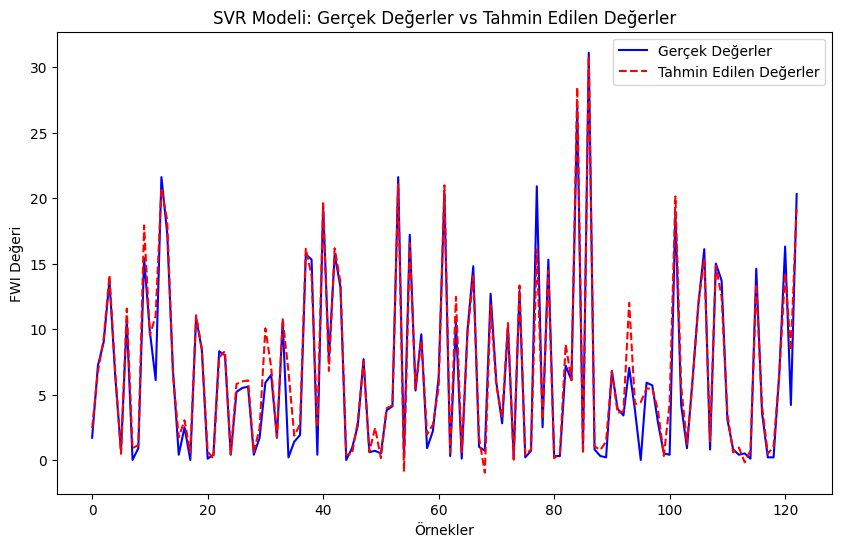

In [691]:
#SVR 1.grafik
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Gerçek Değerler', color='blue')
plt.plot(y_pred, label='Tahmin Edilen Değerler', color='red', linestyle='--')
plt.title("SVR Modeli: Gerçek Değerler vs Tahmin Edilen Değerler")
plt.xlabel("Örnekler")
plt.ylabel("FWI Değeri")
plt.legend()
plt.show()

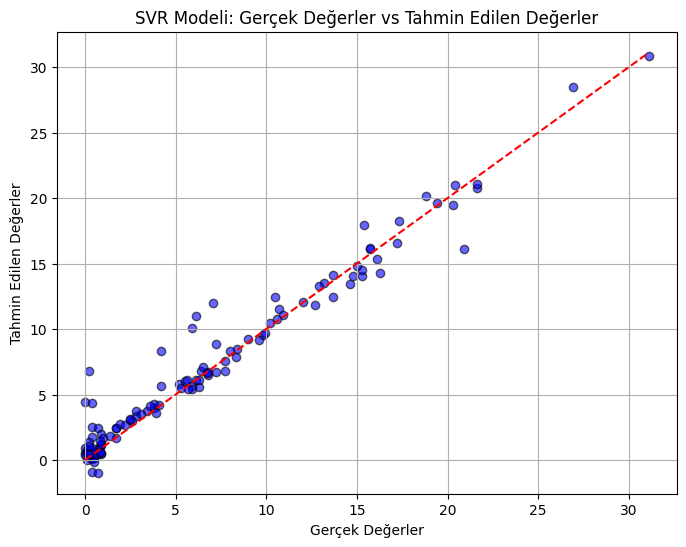

In [692]:
#SVR 2. grafik
plt.figure(figsize=(8, 6))
plt.scatter(y_test.values, y_pred, color='blue', edgecolors='k', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.title("SVR Modeli: Gerçek Değerler vs Tahmin Edilen Değerler")
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Edilen Değerler")
plt.grid(True)
plt.show()

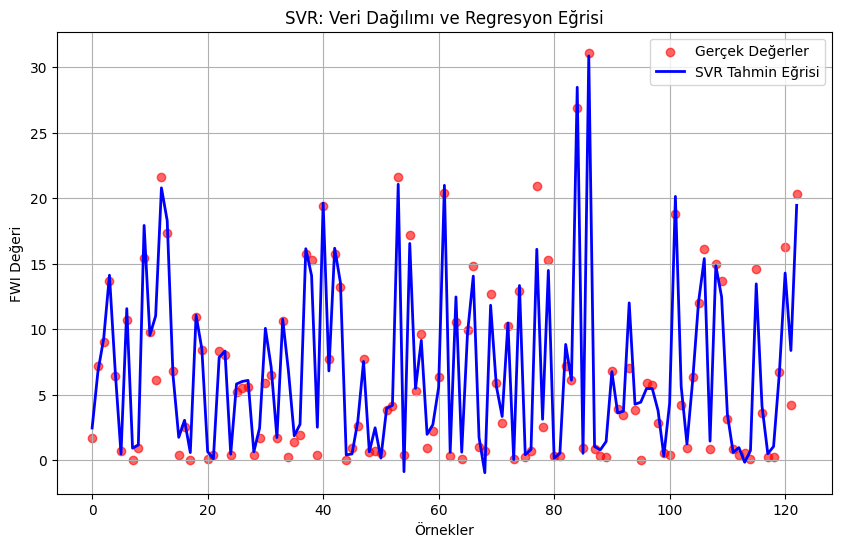

In [693]:
# SVR Veri Dağılımı ve Regresyon Doğrusu Grafiği
plt.figure(figsize=(10, 6))

# Veri noktaları (gerçek değerler)
plt.scatter(range(len(y_test)), y_test.values, color='red', label='Gerçek Değerler', alpha=0.6)

# Tahmin edilen eğri (SVR tahminleri)
plt.plot(range(len(y_pred)), y_pred, color='blue', label='SVR Tahmin Eğrisi', linewidth=2)

plt.title("SVR: Veri Dağılımı ve Regresyon Eğrisi")
plt.xlabel("Örnekler")
plt.ylabel("FWI Değeri")
plt.legend()
plt.grid(True)
plt.show()

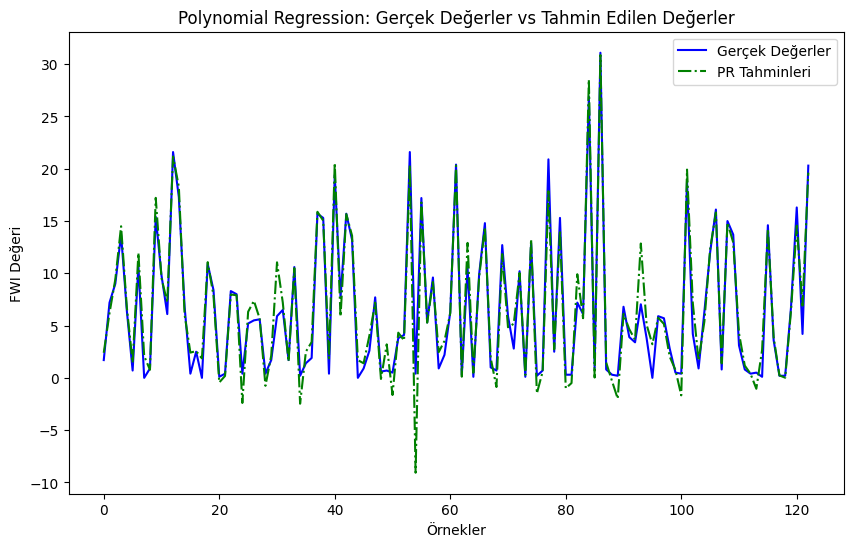

In [694]:
# 6. PR Sonuçlarını Görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Gerçek Değerler', color='blue')
plt.plot(y_pred_pr, label='PR Tahminleri', color='green', linestyle='-.')
plt.title("Polynomial Regression: Gerçek Değerler vs Tahmin Edilen Değerler")
plt.xlabel("Örnekler")
plt.ylabel("FWI Değeri")
plt.legend()
plt.show()

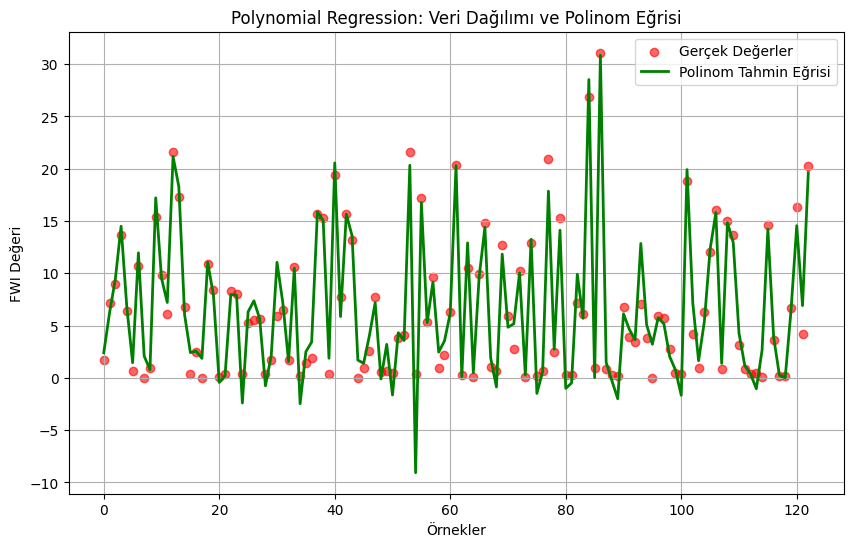

In [695]:
# PR Veri Dağılımı ve Polinom Eğrisi Grafiği
plt.figure(figsize=(10, 6))

# Veri noktaları (gerçek değerler)
plt.scatter(range(len(y_test)), y_test.values, color='red', label='Gerçek Değerler', alpha=0.6)

# Tahmin edilen polinom eğrisi (PR tahminleri)
plt.plot(range(len(y_pred_pr)), y_pred_pr, color='green', label='Polinom Tahmin Eğrisi', linewidth=2)

plt.title("Polynomial Regression: Veri Dağılımı ve Polinom Eğrisi")
plt.xlabel("Örnekler")
plt.ylabel("FWI Değeri")
plt.legend()
plt.grid(True)
plt.show()


In [696]:
# Çapraz Doğrulama Sonuçları
print("SVR Çapraz Doğrulama Skorları:", cv_scores_svr)
print("SVR Ortalama CV Skoru:", np.mean(cv_scores_svr))
print("Polynomial Regression Çapraz Doğrulama Skorları:", cv_scores_pr)
print("Polynomial Regression Ortalama CV Skoru:", np.mean(cv_scores_pr))
# Sonuçların Karşılaştırılması
results = {
    'Model': ['SVR', 'Polynomial Regression'],
    'R² Score': [r2, r2_pr],
    'MAE': [mae, mae_pr]
}
results_df = pd.DataFrame(results)
print(results_df)



SVR Çapraz Doğrulama Skorları: [0.96826719 0.94716879 0.90176419 0.95680182 0.98464285]
SVR Ortalama CV Skoru: 0.9517289678429902
Polynomial Regression Çapraz Doğrulama Skorları: [0.9658455  0.94844288 0.95811765 0.96377039 0.97367727]
Polynomial Regression Ortalama CV Skoru: 0.9619707383642974
                   Model  R² Score       MAE
0                    SVR  0.955448  0.854829
1  Polynomial Regression  0.941122  1.076403


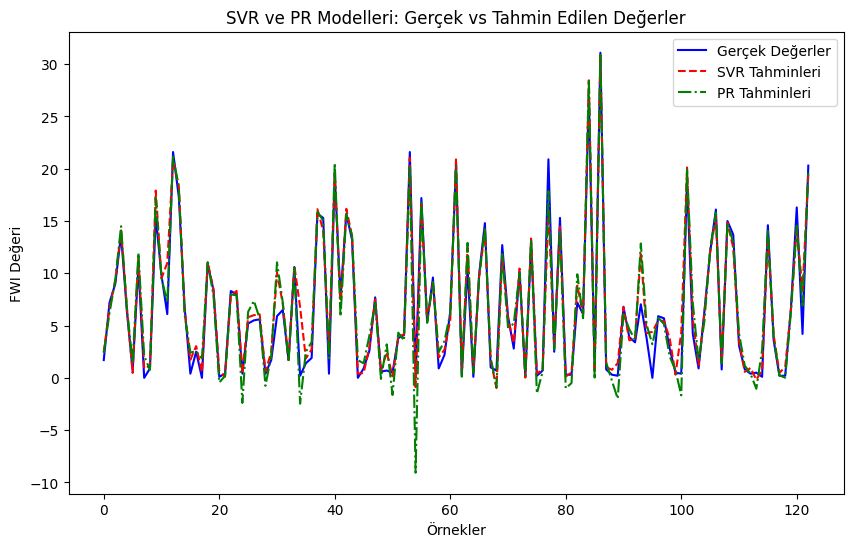

In [697]:
#iki modelin karşılaştırılması
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Gerçek Değerler', color='blue')
plt.plot(y_pred, label='SVR Tahminleri', color='red', linestyle='--')
plt.plot(y_pred_pr, label='PR Tahminleri', color='green', linestyle='-.')
plt.title("SVR ve PR Modelleri: Gerçek vs Tahmin Edilen Değerler")
plt.xlabel("Örnekler")
plt.ylabel("FWI Değeri")
plt.legend()
plt.show()
